In [1]:
import pandas as pd
import psycopg2
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
csv_path = "C:\\Users\\HP\\machine learning projects\\database\\customers.csv"
df_customers = pd.read_csv(csv_path)

In [3]:
# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    dbname="customer_db",
    user="postgres",
    password="arpita11",
    host="localhost",
    port="5432"
)

# Create a cursor object
cursor = conn.cursor()
print("connection succesful.")

connection succesful.


In [4]:
# Iterate over DataFrame rows to insert data into PostgreSQL
for index, row in df_customers.iterrows():
    sql_insert_query = """
        INSERT INTO customers ( CustomerID ,Name ,Age , Email , AnnualIncome, SpendingScore) 
        VALUES (%s, %s, %s, %s, %s, %s)
    """
    
    cursor.execute(sql_insert_query, (
        row['CustomerID'], 
        row['Name'], 
        row['Age'], 
        row['Email'], 
        row['AnnualIncome'], 
        row['SpendingScore']
    ))

# Commit the transaction to save changes in the database
conn.commit()

print("Data inserted successfully into the 'customers' table.")


Data inserted successfully into the 'customers' table.


In [13]:
# Check for missing values
print(df_customers.isnull().sum())

# Fill missing values with the mean for numeric columns
df_customers['Age'] = df_customers['Age'].fillna(df_customers['Age'].mean())
df_customers['AnnualIncome'] = df_customers['AnnualIncome'].fillna(df_customers['AnnualIncome'].mean())
df_customers['SpendingScore'] = df_customers['SpendingScore'].fillna(df_customers['SpendingScore'].mean())

# Verify there are no missing values
print(df_customers.isnull().sum())


CustomerID       0
Name             0
Age              0
Email            0
AnnualIncome     0
SpendingScore    0
Cluster          0
dtype: int64
CustomerID       0
Name             0
Age              0
Email            0
AnnualIncome     0
SpendingScore    0
Cluster          0
dtype: int64


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


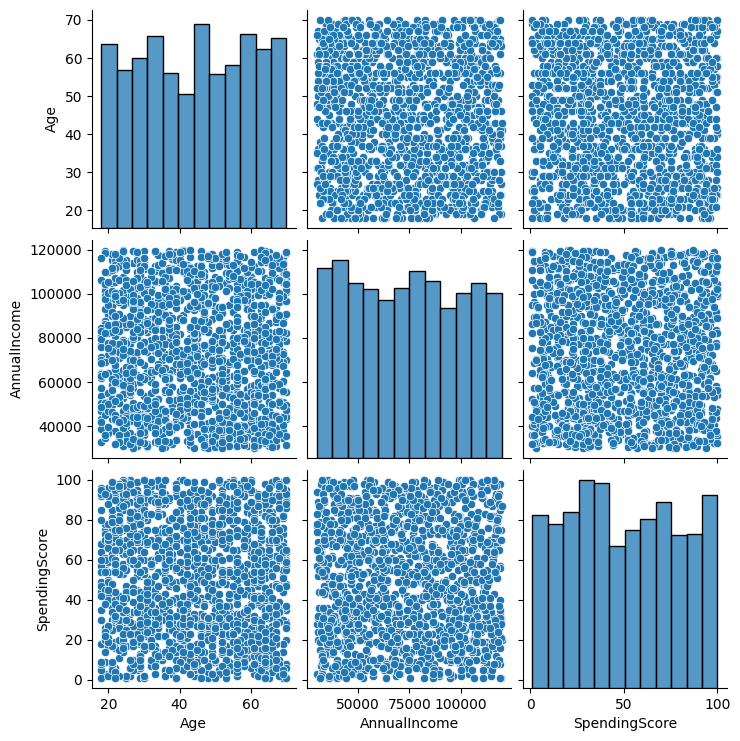

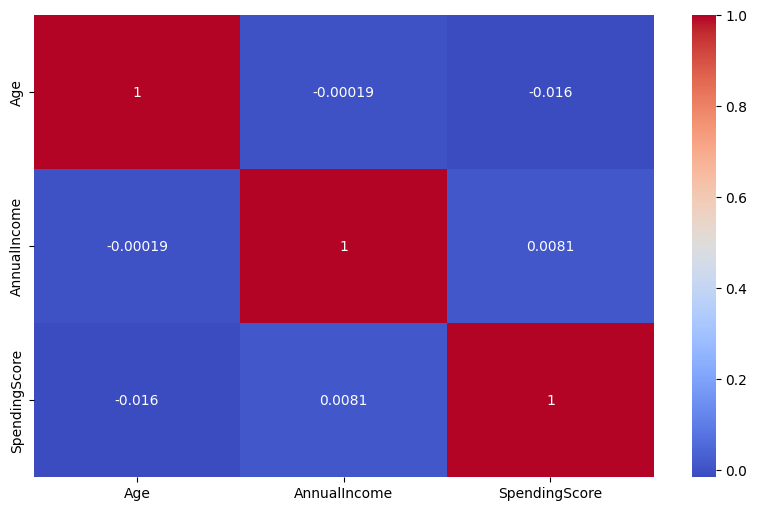

In [14]:

# Pairplot to visualize relationships between features
sns.pairplot(df_customers[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_customers[['Age', 'AnnualIncome', 'SpendingScore']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_customers[['Age', 'AnnualIncome', 'SpendingScore']])


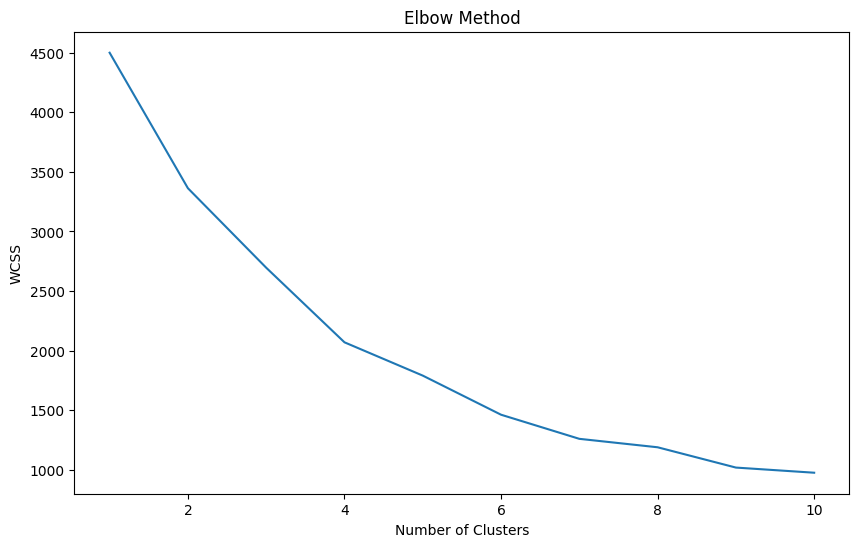

In [16]:
from sklearn.cluster import KMeans

# Calculate within-cluster sum of squares (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
